# Data Scientist Challenge EDA

This is my submission for a data scientist technical challenge from a company who is a global player in music streaming services. The goal of this challenge was to analyze the behavior of listeners, specifically when it comes to skipping a track and provide recommendations to the product manager. Without any explicitly-defined questions, I performed extensive exploratory analysis to understand what may influence a listener's decision to skip a track. 

### Import, clean, and prepare data for analyis and modeling

In [2]:
import json 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [6]:
# load data from json file into pandas df

filepath = 'data_science_challenge.json'

with open(filepath) as f:
    data = json.load(f)
    
df = pd.DataFrame(data=data['data'], columns=data['columns'])


In [84]:
# check for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828169 entries, 0 to 828168
Data columns (total 15 columns):
ts                                               828169 non-null int64
country_code                                     828169 non-null object
client_version                                   828169 non-null object
listening_context                                828169 non-null object
recommender_algorithm_name                       828169 non-null object
track_id                                         828169 non-null object
track_genre_category                             828169 non-null object
track_upload_date                                828169 non-null int64
track_duration                                   828169 non-null int64
listen_duration                                  828169 non-null int64
listener_id                                      828169 non-null object
listener_signup_date                             828169 non-null int64
listener_top_genre_category_li

In [106]:
# it appears there are some nulls in these columns

df[df['listener_prev_month_listening_time'].isnull()].head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened
121,1466968342,US,36.4.20,tracks,collaborative,eb23bfabf4d46ff4f2fb3e0caedcaea8,Speech,1450137600,426781,14721,000475010431369b2de9db784135acd0,1384646400,Jazz,NaN,NaN
154,1466910758,GB,204.0.0,users,content-based,b8322e103ad39ef30d2b13ea7fc2ac2e,Pop,1456185600,371691,17804,000c7ab2b64e766d98a5e174671ef574,1461801600,HipHop & R&B,NaN,NaN
182,1467045909,US,152.0.32,tracks,content-based,270bd39b2552409581786fa0da861fc9,Dance & Electronic,1458777600,557125,557125,00152c7d930da31e8c1b017be89a6109,1424995200,Dance & Electronic,NaN,NaN
183,1467046228,US,152.0.32,tracks,content-based,26ad976778ddee6a568d9b37fb858b6f,Dance & Electronic,1460678400,877704,877704,00152c7d930da31e8c1b017be89a6109,1424995200,Dance & Electronic,NaN,NaN
184,1467046730,US,152.0.32,tracks,content-based,611fe9765b6fed7c30a4eb588bcc12cd,HipHop & R&B,1460678400,744753,744753,00152c7d930da31e8c1b017be89a6109,1424995200,Dance & Electronic,NaN,NaN


In [ ]:
df[df['listener_prev_month_avg_daily_tracks_listened'].isnull()].head()

In [7]:
# fill these NaN values with 0s, as the users did not listen the prior month

df.fillna(0, inplace=True)

In [4]:
# check again - looks better

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828169 entries, 0 to 828168
Data columns (total 15 columns):
ts                                               828169 non-null int64
country_code                                     828169 non-null object
client_version                                   828169 non-null object
listening_context                                828169 non-null object
recommender_algorithm_name                       828169 non-null object
track_id                                         828169 non-null object
track_genre_category                             828169 non-null object
track_upload_date                                828169 non-null int64
track_duration                                   828169 non-null int64
listen_duration                                  828169 non-null int64
listener_id                                      828169 non-null object
listener_signup_date                             828169 non-null int64
listener_top_genre_category_li

In [105]:
# check out the columns

df.head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,...,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,date,track_post_date,listener_join_date,days_track_online,days_user_account_online,percent_played,skipped
0,1467398683,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,1466640000,413933,413933,...,HipHop & R&B,617270940.0,22.5,2016-07-01,2016-06-23,2011-12-25,8,1650,1.000000,0
1,1467398924,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,1466726400,402640,110722,...,HipHop & R&B,617270940.0,22.5,2016-07-01,2016-06-24,2011-12-25,7,1650,0.274990,1
2,1467820636,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,1467072000,494811,193818,...,HipHop & R&B,617270940.0,22.5,2016-07-06,2016-06-28,2011-12-25,8,1655,0.391701,1
3,1467401951,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,1402272000,361585,361585,...,HipHop & R&B,112239180.0,10.5,2016-07-01,2014-06-09,2013-09-17,753,1018,1.000000,0
4,1467402159,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,1448668800,373700,160162,...,HipHop & R&B,112239180.0,10.5,2016-07-01,2015-11-28,2013-09-17,216,1018,0.428584,1


In [8]:
# remove rows where track duration == 0

df.drop(df[df['track_duration'] == 0].index, inplace=True)

# remove rows where listen duration < 0

df.drop(df[df['listen_duration'] < 0].index, inplace=True)

# remove rows where listen duration > track_duration

df.drop(df[df['listen_duration'] > df['track_duration']].index, inplace=True)

In [9]:
# confirm number of removed rows

len(df)

810053

In [10]:
# add columns with human-readable timestamps

df['ts'] = df['ts'].apply(lambda x: datetime.utcfromtimestamp(x)).dt.normalize()
df['track_upload_date'] = df['track_upload_date'].apply(lambda x: datetime.utcfromtimestamp(x)).dt.normalize()
df['listener_signup_date'] = df['listener_signup_date'].apply(lambda x: datetime.utcfromtimestamp(x)).dt.normalize()

# convert listener_prev_month_listening_time to hours

df['listener_prev_month_listening_time'] = round(df['listener_prev_month_listening_time']/3600000,3)

# convert track_duration and listen_duration to minutes

df['track_duration_mins'] = round(df['track_duration']/60000,3)
df['listen_duration_mins'] = round(df['listen_duration']/60000,3)
df.drop(columns=['track_duration', 'listen_duration'], inplace=True)

In [245]:
df.head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,track_duration_mins,listen_duration_mins
0,2016-07-01,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,2016-06-23,0001d5755511cae40e5b32d83a3decce,2011-12-25,HipHop & R&B,171.46,22.50,6.90,6.90
1,2016-07-01,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,2016-06-24,0001d5755511cae40e5b32d83a3decce,2011-12-25,HipHop & R&B,171.46,22.50,6.71,1.84
2,2016-07-06,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,2016-06-28,0001d5755511cae40e5b32d83a3decce,2011-12-25,HipHop & R&B,171.46,22.50,8.25,3.23
3,2016-07-01,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,2014-06-09,000264c5b34ad04999535c8b6a8b86e2,2013-09-17,HipHop & R&B,31.18,10.50,6.03,6.03
4,2016-07-01,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,2015-11-28,000264c5b34ad04999535c8b6a8b86e2,2013-09-17,HipHop & R&B,31.18,10.50,6.23,2.67


The data set now appears to be free from nulls and contains datetime objects to user later for time-series analysis.

### Analysis

For the following section, I'll define some new metrics to help understand the share of tracks that are skipped:
 - **days_track_online:** this is the the number of days the track has been online at the time of listen.
 - **days_user_account_online:** this is the the number of days the since the user signed up at the time of listen.
 - **percent_played:** this is the listen duration divided by track duration, rounded to two decimal places.
 - **skipped:** this is a binary column to indicate if a track was skipped or not. A 1% acceptable tolerance was added between listen_duration and track_duration to avoid mis-classification due to rounding error. We may want to increase this tolerance in further analysis based on how we want to define "skipped".

In [11]:
# add some features to explore

df['days_track_online'] = (df['ts'] - df['track_upload_date']).dt.days
df['days_user_account_online'] = (df['ts'] - df['listener_signup_date']).dt.days
df['percent_played'] = round(df['listen_duration_mins']/df['track_duration_mins'],2)
df['skipped'] = np.where(df['listen_duration_mins'] < (df['track_duration_mins'] * .99), 1, 0) 

In [12]:
# test the percent_played and skipped columns for accuracy
# this should not contain any values == 1.00

df[df['skipped'] == 1]['percent_played'].value_counts()

0.01    33584
0.00    31546
0.02    28717
0.03    22166
0.04    16938
0.05    13310
0.06    10996
0.07     9122
0.08     7835
0.09     7121
0.10     6132
0.11     5755
0.12     5314
0.13     4767
0.14     4596
0.15     4176
0.16     3897
0.17     3600
0.18     3420
0.19     3362
0.20     3106
0.21     3013
0.22     2995
0.23     2660
0.24     2550
0.25     2541
0.27     2407
0.26     2355
0.28     2314
0.29     2279
        ...  
0.64     1004
0.74      998
0.71      997
0.66      997
0.67      994
0.73      970
0.82      963
0.72      960
0.80      949
0.89      948
0.91      945
0.79      943
0.88      934
0.76      933
0.84      933
0.83      932
0.75      932
0.94      930
0.95      928
0.87      927
0.85      926
0.77      924
0.81      924
0.70      921
0.78      920
0.90      917
0.92      913
0.93      912
0.86      903
0.99      649
Name: percent_played, Length: 100, dtype: int64

In [103]:
# check summary stats

df.describe()

,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,track_duration_mins,listen_duration_mins,days_track_online,days_user_account_online,percent_played,skipped
count,810053.00,810053.00,810053.00,810053.00,810053.00,810053.00,810053.00,810053.00
mean,2040.18,42.34,8.77,4.96,478.16,837.56,0.67,0.41
std,2775.53,43.45,16.65,8.68,490.03,582.64,0.43,0.49
min,0.00,0.00,0.00,0.00,3.00,35.00,0.00,0.00
25%,186.81,12.00,5.05,0.71,79.00,343.00,0.13,0.00
50%,1023.52,30.00,6.25,4.65,316.00,755.00,1.00,0.00
75%,2791.87,57.00,7.57,6.57,744.00,1225.00,1.00,1.00
max,35132.37,637.50,700.07,577.57,3227.00,3146.00,1.00,1.00


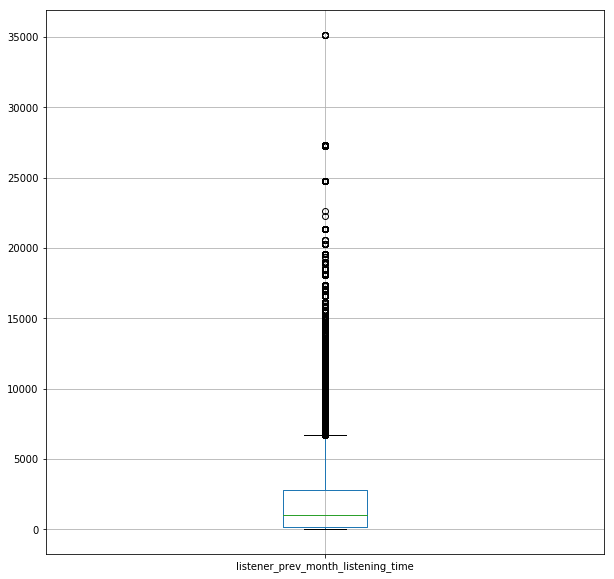

In [248]:
# visualize distribution of listener_prev_month_listening_time

df['listener_prev_month_listening_time'].to_frame().boxplot(figsize=(10,10))

There are some things here that don't look right...
 - I converted listener_prev_month_listening_time to hours above. How is the max over 35,000? Furthermore, how is the mean and 50-percentile over 2000 when there are no more than 744 hours per month? 
 - Hypotheses: 
     - This column isn't actually in milliseconds as expected.
     - The calculation of this column considers the length of all tracks the user touched (skipped or not).
     - Issue with this data.
     - These users are sharing accounts with other people (this app only allows a user to listen on a single device at any given time, but perhaps this has not always been this way?)
     
Further investigation below.

In [139]:
# find the listener_id for the largest outliers

df[df['listener_prev_month_listening_time'] > 25000]['listener_id'].value_counts()

26c0db402132d58a8d9e407e510695d3    207
3c3a00f51228de651fce217b56dc7ce9     14
05aee0c130dbf77a6a063bc0386e30f6      6
Name: listener_id, dtype: int64

In [249]:
#dg = df[df['listener_id'] == '05aee0c130dbf77a6a063bc0386e30f6'].groupby(pd.Grouper(key='ts', freq='M'))['listen_duration'].sum()

df[df['listener_id'] == '26c0db402132d58a8d9e407e510695d3'].groupby('ts')['listen_duration_mins'].sum()

ts
2016-06-26   1035.06
2016-06-28    405.29
2016-07-03    147.63
2016-07-04     65.84
2016-07-10    312.38
2016-07-14      5.13
2016-07-16      6.94
2016-07-21      8.05
Name: listen_duration_mins, dtype: float64

As we don't have the full data for the prior month, it won't be possible to confirm the user's listen time for that month. Based on the documentation provided with this challenge, this column is defined as:

"the total duration that the user listened in the previous month (in all contexts)"

As it does not explicitly state how this is calculated, I will make the assumption that this is related to one of my hypotheses above (or another). I will not exclude outliers, as there are many of them.

In [164]:
# check distribution of skipped/non-skipped tracks

df['skipped'].value_counts()

0    474034
1    336019
Name: skipped, dtype: int64

In regards to the percentage of skipped tracks, our data set is faily-well balanced. Let's check the univariate distributions of a few numerical columns.

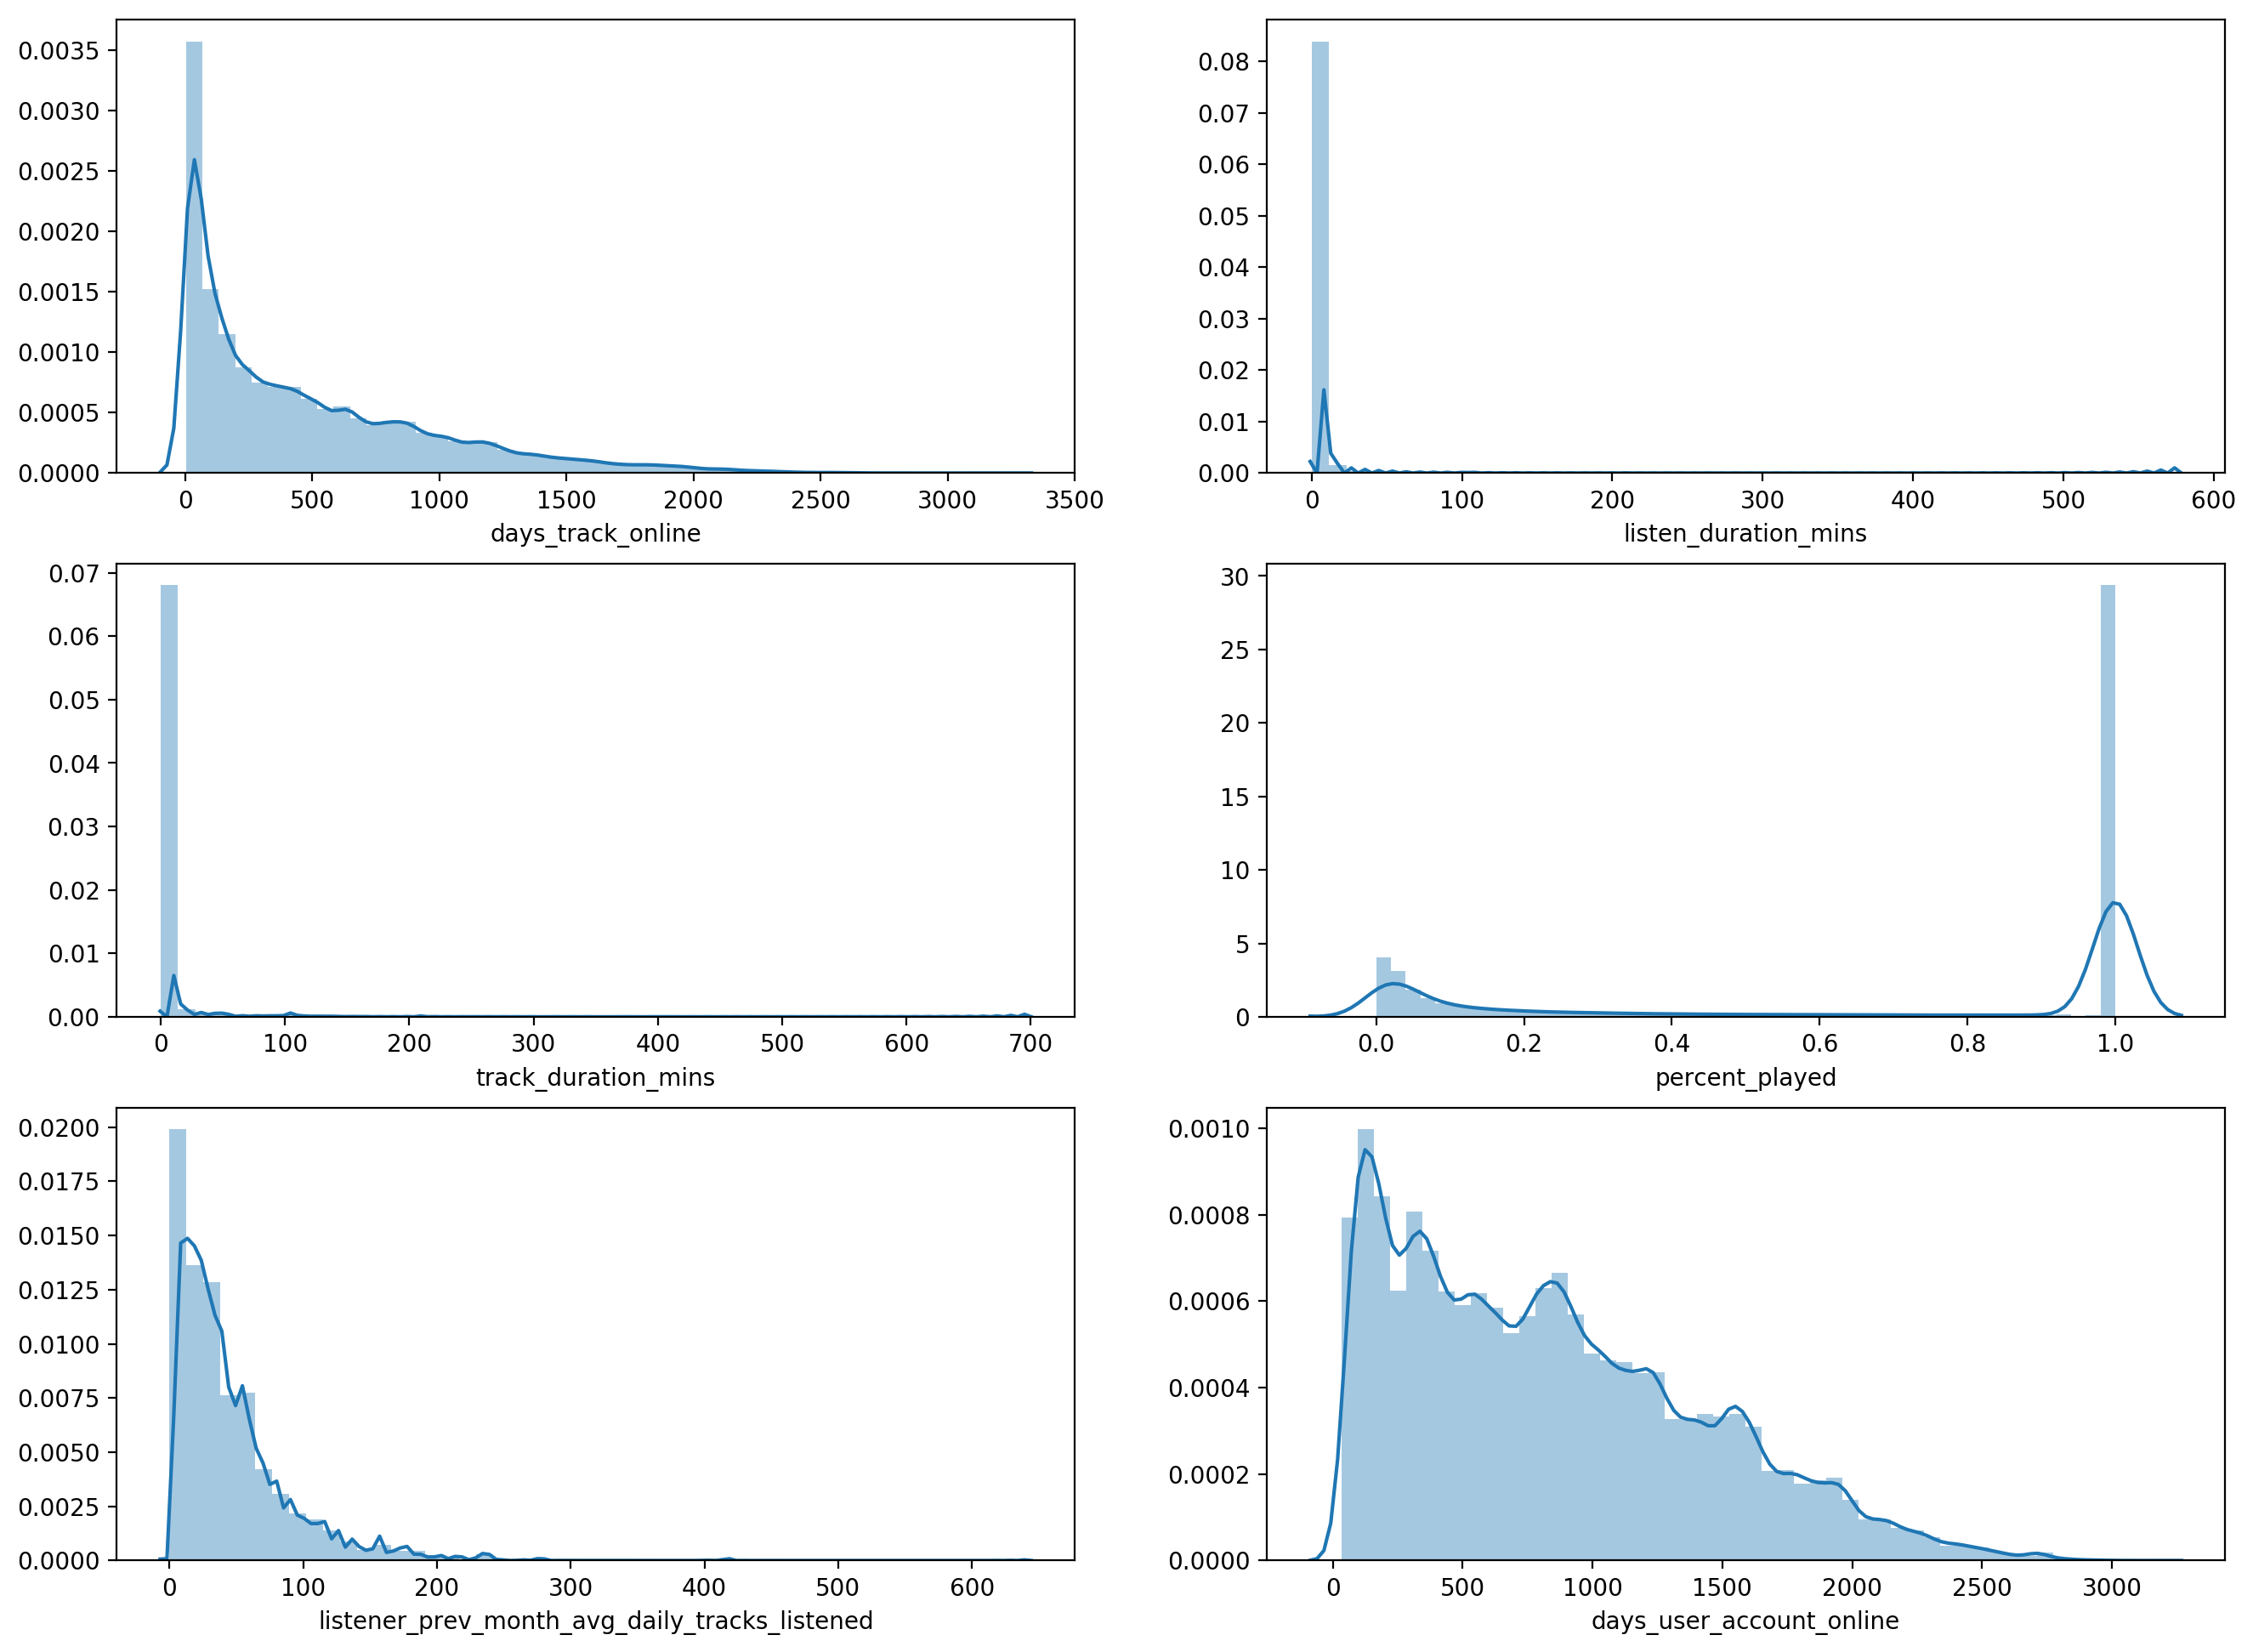

In [100]:
# visualize the distribution of numerical features

f, axes = plt.subplots(3, 2, figsize=(16,12), dpi=200)

sns.distplot(df['days_track_online'], ax=axes[0, 0])
sns.distplot(df['listen_duration_mins'], ax=axes[0, 1])
sns.distplot(df['track_duration_mins'], ax=axes[1, 0])
sns.distplot(df['percent_played'], ax=axes[1, 1])
sns.distplot(df['listener_prev_month_avg_daily_tracks_listened'], ax=axes[2, 0])
sns.distplot(df['days_user_account_online'], ax=axes[2, 1])

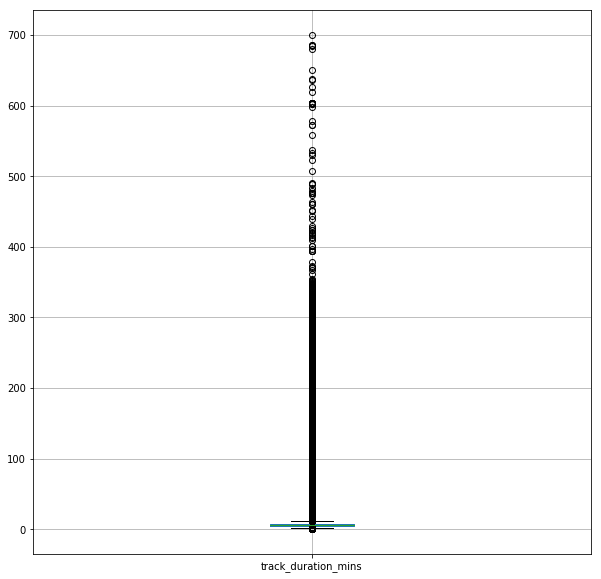

In [104]:
# look deeper into the distribution of track_duration_mins

df['track_duration_mins'].to_frame().boxplot(figsize=(10,10))

From the data above, there are a few early insights:
 - The distribution of time_track_online is heavily weighted toward 0, indicating that recommended tracks are relatively new, on average.
 - The median of listener_prev_month_avg_daily_tracks_listened is 30. There are some extreme values here, which should be investigated further.
 - The distribution of user account days online is skewed as well; many of the users are new.
 - The 50-percentile of track_duration is 6.25 minutes and the maximum is 700. As a listener myself, this seems like a reasonable distribution of track duration. There are many songs of normal length, as well as some DJ sets that are much longer.

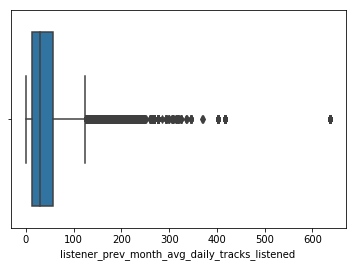

In [101]:
# visualize listener_prev_month_avg_daily_tracks_listened to understand outliers.

sns.boxplot(x=df["listener_prev_month_avg_daily_tracks_listened"])

We can see that there is what appears to be a single data point (or group of data points), which skew this distribution. Let's confirm the number of values and drop them.

In [114]:
df[df['listener_prev_month_avg_daily_tracks_listened'] > 500]['listener_prev_month_avg_daily_tracks_listened'].value_counts()

637.50    61
Name: listener_prev_month_avg_daily_tracks_listened, dtype: int64

In [115]:
df[df['listener_prev_month_avg_daily_tracks_listened'] > 500]['listener_id'].nunique()

1

There are 61 rows with 637.5 average daily tracks listened to, all from one user. 

In [265]:
# drop these rows

df = df[df['listener_prev_month_avg_daily_tracks_listened'] < 500]

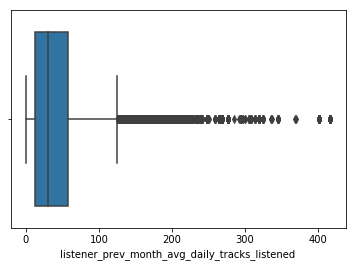

In [266]:
# check distribution again

sns.boxplot(x=df["listener_prev_month_avg_daily_tracks_listened"])

In [118]:
df["listener_prev_month_avg_daily_tracks_listened"].describe()

count   809992.00
mean        42.30
std         43.14
min          0.00
25%         12.00
50%         30.00
75%         57.00
max        417.00
Name: listener_prev_month_avg_daily_tracks_listened, dtype: float64

After dropping these rows, this looks much more realistic. We may want to drop the few data points around 400 as well, but I'll leave these for now.

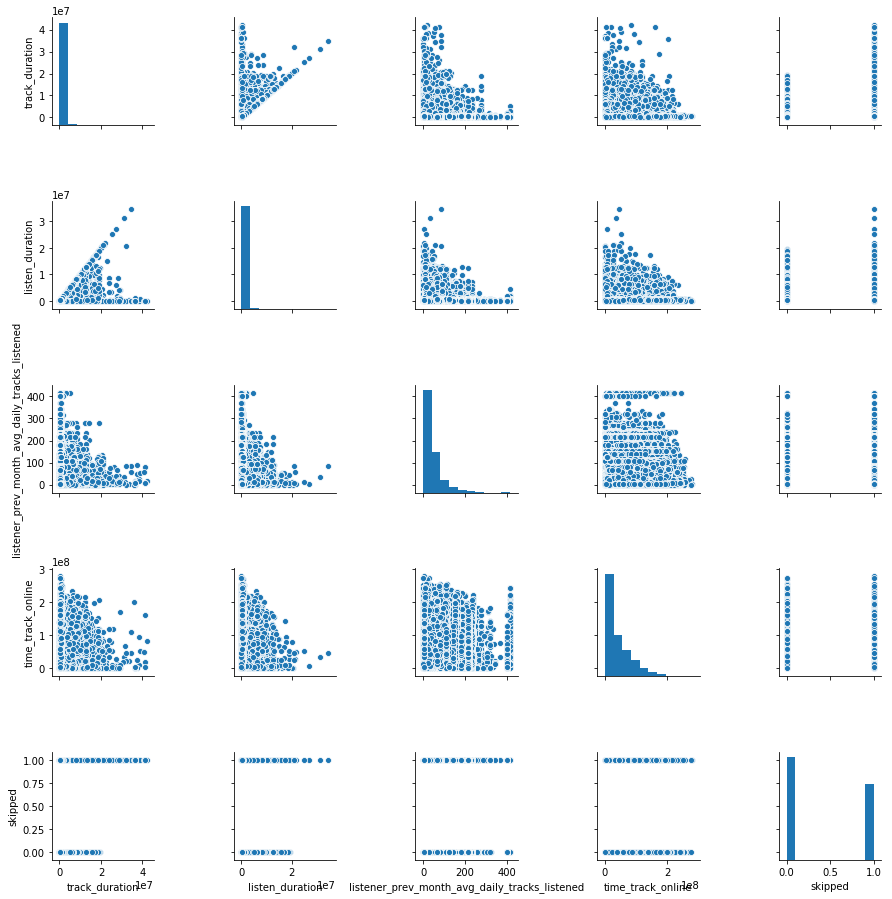

In [33]:
# explore the relationships between variables

sns.pairplot(df[['track_duration', 'listen_duration','listener_prev_month_avg_daily_tracks_listened'
                 , 'time_track_online', 'skipped']])

From the pairplots above, there do not appear to be many interesting relationships to explore. I'll look into each feature in more detail below.

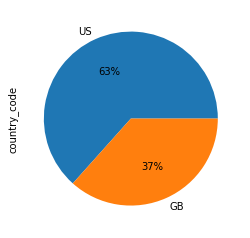

In [268]:
# track split by country

country_counts = df['country_code'].value_counts()

country_counts.plot(kind='pie', autopct='%1.0f%%')

In [269]:
# skip percentage by country

cty_skip_perc = (df.groupby(['country_code'])['skipped'].sum()/df.groupby(['country_code'])['skipped'].count())

cty_skip_perc

country_code
GB   0.41
US   0.41
Name: skipped, dtype: float64

From this data set 63% of listens are for US customers and the remaining 37% are from GB. Both countries have equal skip rates of 41%.

In [270]:
# look at plays by listening context

df['listening_context'].value_counts().sort_values(ascending=False)

tracks                  469145
users                   100110
playlists                90481
collection               54866
you                      41340
stream                   31251
search                   11131
charts                    6294
personal-recommended      5374
Name: listening_context, dtype: int64

In [30]:
df.groupby(['listening_context'])['skipped'].sum()

listening_context
charts                     491
collection               10703
personal-recommended       309
playlists                22351
search                    2905
stream                    9465
tracks                  255669
users                    21849
you                      12277
Name: skipped, dtype: int32

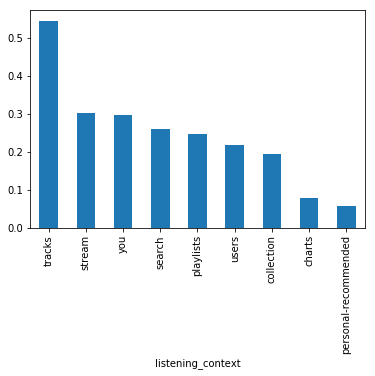

In [34]:
# look at percentage of skips by listening context

context_skip_perc = (df.groupby(['listening_context'])['skipped'].sum()/df.groupby(['listening_context'])['skipped'].count())

context_skip_perc.sort_values(ascending=False).plot(kind='bar')

Over 50% of listens come from the 'tracks' listening context (57%). This context also has a skip rate over 50%, which is much higher than the other contexts, with 'stream' and 'you' following with only 30% skip rate. Let's compare listening context to genre to see if anything appears to explain this.

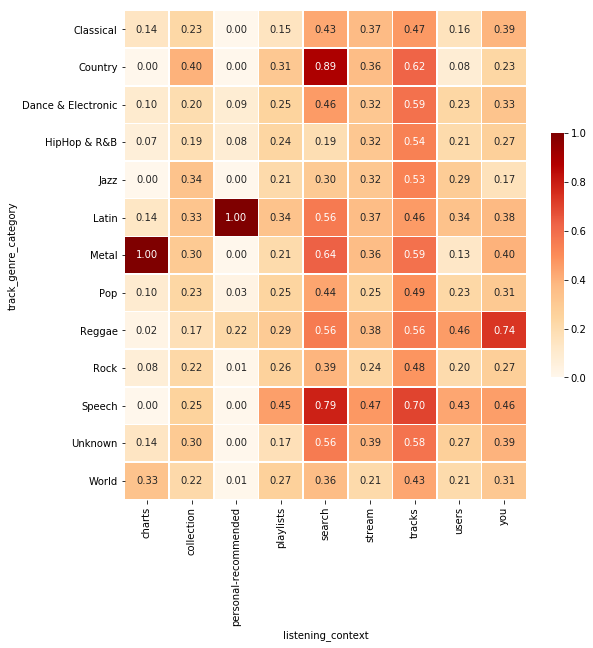

In [325]:
# percentage of skipped tracks by listening context and genre

context_vs_genre = df.groupby(['listening_context', 'track_genre_category']
          )['skipped'].mean().to_frame().reset_index().pivot(index='track_genre_category', columns='listening_context')
context_vs_genre.columns = context_vs_genre.columns.droplevel()

plt.figure(figsize = (9,9))
sns.heatmap(context_vs_genre, cmap='OrRd', annot=True,
            fmt=".2f", square=False, linewidths=.5, cbar_kws={"shrink": .5})


In the context of 'tracks', it appears that the average skip rates are higher for all genres. The genre with the highest skip rate is 'Speech', which also appears high in other contexts. Is it possible that more 'Speech' tracks are visited in this context, leading to a higher average skip rate?

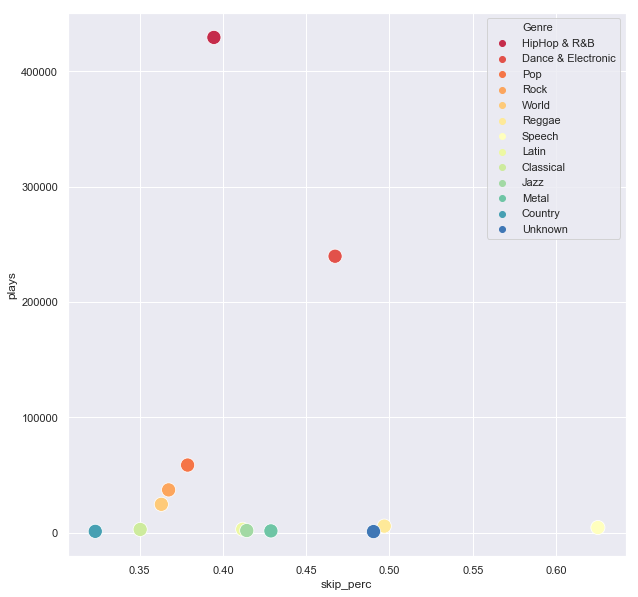

In [296]:
scatter_table = df['track_genre_category'].value_counts().to_frame()
scatter_table['skips'] = df.groupby(['track_genre_category'])['skipped'].sum().to_frame()
scatter_table['skip_perc'] = scatter_table['skips']/scatter_table['track_genre_category']
scatter_table.reset_index(inplace=True)
scatter_table.rename(columns={"track_genre_category": "plays", "index":"Genre"}, inplace=True)
sns.set()
plt.figure(figsize = (10,10))
c = sns.color_palette("Spectral", 13)
ax = sns.scatterplot(x="skip_perc", y="plays",
                     hue="Genre",
                     s=200,
                     palette=c,
                     data=scatter_table)

In [320]:
df[df['listening_context']== 'tracks'].groupby(['track_genre_category'])['ts'].count()


track_genre_category
Classical               1544
Country                  448
Dance & Electronic    152961
HipHop & R&B          234486
Jazz                    1035
Latin                   1688
Metal                    824
Pop                    32467
Reggae                  3203
Rock                   20840
Speech                  3034
Unknown                  624
World                  15991
Name: ts, dtype: int64

The majority of the plays come from 'Dance & Electronic' and 'Hip Hop & R&B', which both have higher-than-average skip rates for this context.

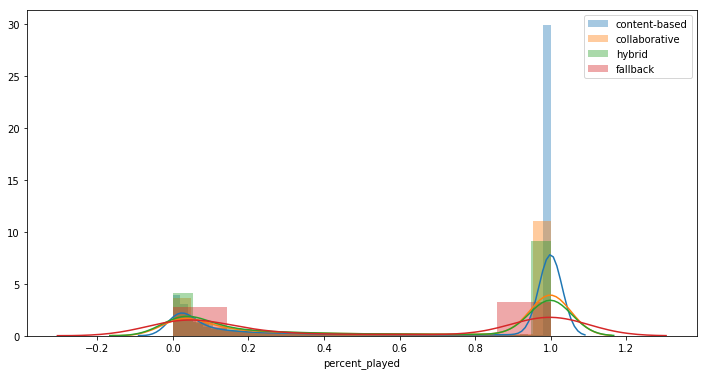

In [272]:
# let's explore the track percent_played by recommender algorithm

plt.figure(figsize = (12,6))

for i in df['recommender_algorithm_name'].unique():
    sns.distplot(df['percent_played'][df['recommender_algorithm_name'] == i], label=i)

    plt.legend(loc='best')

The distributions of track play percentage vary greatly between algorithms. It appears that the content-based algorithm has more tracks that were played in their entirety when compared to others. Collaborative and hybrid perform around the same, with wider concentrations around 0 and 100%. Fallback has the widest concentrations around these two.

Let's look at the skip rate by algorithm.

In [273]:
# understanding percentage of tracks skipped by algorithm

df.groupby('recommender_algorithm_name')['skipped'].sum()/df.groupby('recommender_algorithm_name')['skipped'].count()

recommender_algorithm_name
collaborative   0.48
content-based   0.40
fallback        0.55
hybrid          0.53
Name: skipped, dtype: float64

In [16]:
df.groupby('recommender_algorithm_name')['skipped'].sum()

recommender_algorithm_name
collaborative     21844
content-based    291921
fallback           1280
hybrid            20974
Name: skipped, dtype: int32

We see that fallback performs the worst, on average, and content-based performs the best. Let's take a look at the sample size for each algorithm next.

In [274]:
# could this potential difference in means be related to sample size?

df['recommender_algorithm_name'].value_counts()

content-based    722278
collaborative     45545
hybrid            39861
fallback           2308
Name: recommender_algorithm_name, dtype: int64

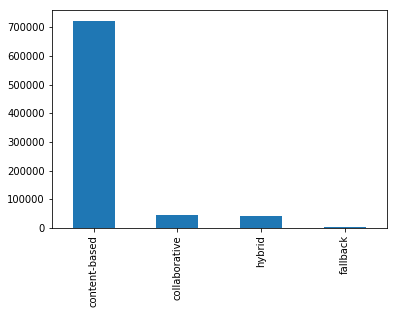

In [276]:
df['recommender_algorithm_name'].value_counts().plot(kind='bar')

We have a quite imbalanced data set, with most of our observations being from the content-based algorithm. Intuitively, it would make sense that the fallback algorithm has fewer observations and a higher skip rate than the others.

Let's take a look at these skip percentages over time for each algo.

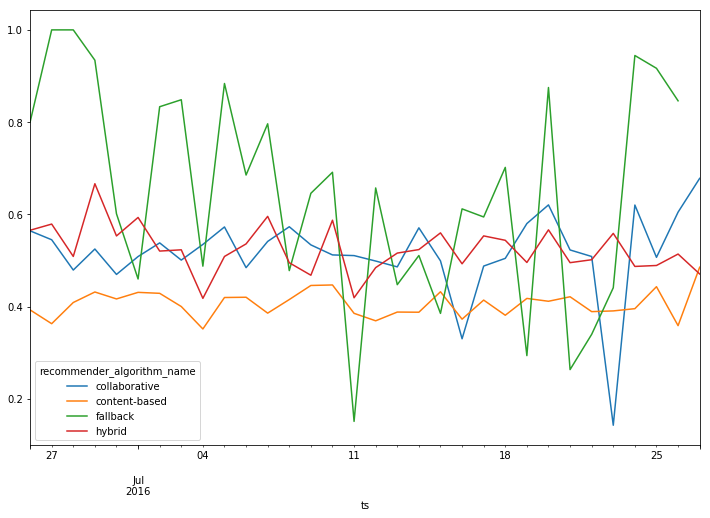

In [277]:
# check for trends and seasonality in skip percentage, by algorithm

daily_skip_perc_by_algo = (df.groupby(['ts','recommender_algorithm_name'])['skipped'].sum()/df.groupby(['ts','recommender_algorithm_name'])['skipped'].count()).unstack()

daily_skip_perc_by_algo.plot(figsize=(12,8))

This time-series view supports the evidence above, with content-based performing better generally across the board. Fallback shows high volatility when compared to the others, likely related to the smaller sample size. We'll try an ANOVA test to see if there is a significant difference in the mean skip rates between algorithms.

 - H0: All recommender algorithms have equal mean skip rates.
 - H1: At least one of the recommender algorithms has a different mean skip rate.

In [278]:
# use ANOVA test to confirm if the means of daily skip rates are indeed different.

daily_skip_perc_by_algo.dropna(inplace=True)

stats.f_oneway(daily_skip_perc_by_algo['collaborative'], daily_skip_perc_by_algo['content-based'],
              daily_skip_perc_by_algo['fallback'], daily_skip_perc_by_algo['hybrid'])


F_onewayResult(statistic=19.021057145439062, pvalue=3.7053350898966194e-10)

As the p-value is less than an alpha level of 0.05, we reject the null hypothesis and conclude that at least one of the three means has a significantly different value than the others.

Let's dive a little deeper to understand how the distribution of play percentage changes based on genre.

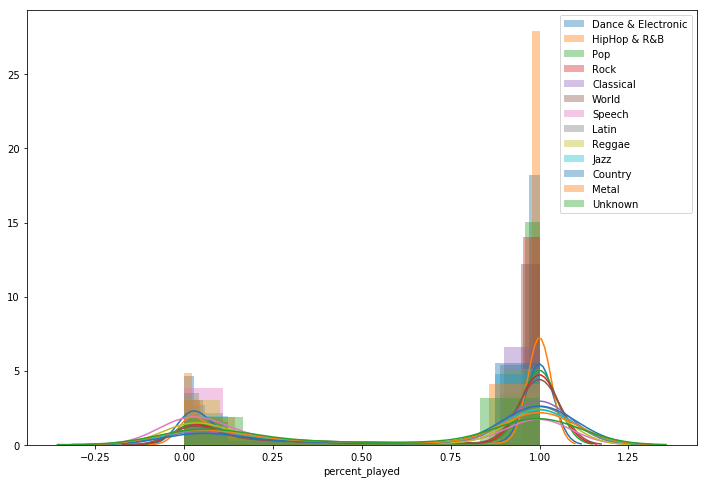

In [279]:
# explore the track play percentage by track genre

plt.figure(figsize = (12,8))

for i in df['track_genre_category'].unique():
    sns.distplot(df['percent_played'][df['track_genre_category'] == i], label=i)

    plt.legend(loc='best')

Looking at the percent played by track_genre_category, we see similar patterns, but HipHop and R&B stands out. It appears that a larger portion of these tracks are played in their entirety.

Let's take a look at skipped track percentage by genre and algorithm.

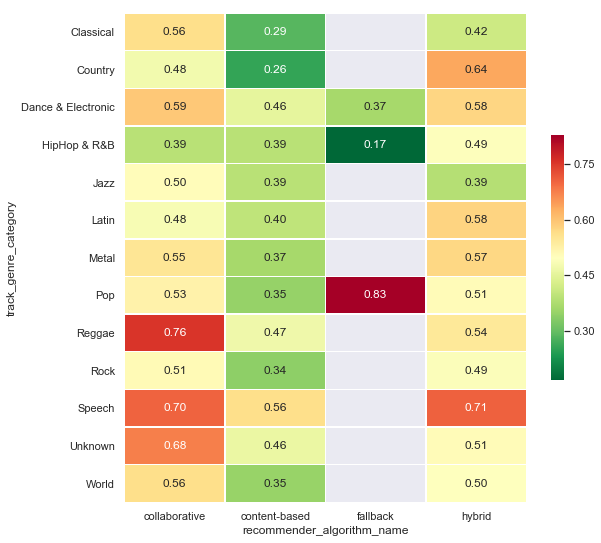

In [315]:
# percentage of skipped tracks by genre and algorithm

algo_vs_genre = df.groupby(['recommender_algorithm_name', 'track_genre_category']
          )['skipped'].mean().to_frame().reset_index().pivot(index='track_genre_category'
                                                                    , columns='recommender_algorithm_name')
algo_vs_genre.columns = algo_vs_genre.columns.droplevel()

plt.figure(figsize = (9,9))
sns.heatmap(algo_vs_genre,  cmap='RdYlGn_r', annot=True,
            fmt=".2f", square=False, linewidths=.5, cbar_kws={"shrink": .5})


It appears there are some outliers from this perspective:
 - 83% of Pop music recommended by the fallback algorithm is skipped, while only 17% of HipHop & R&B is.
 - Reggae is skipped 76% of the time from the collaborative algorithm; much higher than content-based and hybrid.
 - Content-based has stable skip rates across all genres.

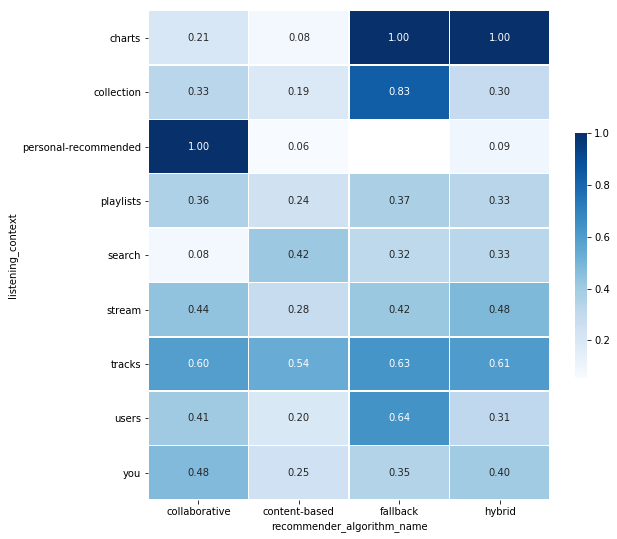

In [37]:
# percentage of skipped tracks by context and algorithm

algo_vs_context = df.groupby(['recommender_algorithm_name', 'listening_context']
          )['skipped'].mean().to_frame().reset_index().pivot(index='listening_context'
                                                                    , columns='recommender_algorithm_name')
algo_vs_context.columns = algo_vs_context.columns.droplevel()

plt.figure(figsize = (9,9))
sns.heatmap(algo_vs_context,  cmap='Blues', annot=True,
            fmt=".2f", square=False, linewidths=.5, cbar_kws={"shrink": .5})


In [19]:
df[(df['listening_context'] == 'search') & (df['recommender_algorithm_name'] == 'content-based')].count()

ts                                               5536
country_code                                     5536
client_version                                   5536
listening_context                                5536
recommender_algorithm_name                       5536
track_id                                         5536
track_genre_category                             5536
track_upload_date                                5536
listener_id                                      5536
listener_signup_date                             5536
listener_top_genre_category_listened             5536
listener_prev_month_listening_time               5536
listener_prev_month_avg_daily_tracks_listened    5536
track_duration_mins                              5536
listen_duration_mins                             5536
days_track_online                                5536
days_user_account_online                         5536
percent_played                                   5536
skipped                     

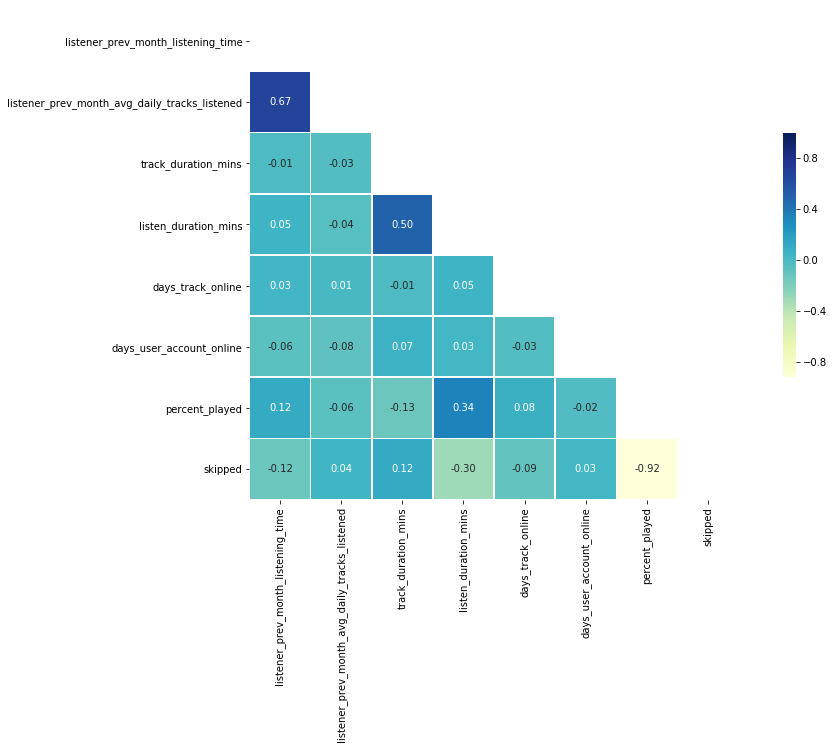

In [323]:
# plot correlation matrix to understand relationship between features

corr = df.corr()

# mask top half of correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (16,9))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot=True,
            fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is no strong correlation between variables (except when expected). This does not allow us to draw any inferences on what would impact the skip rate. As not many of the features are correlated, we won't need to drop many before beginning to model. I will, however, remove the percent_played and listen_duration columns, as these are features that would obviously be unknown before a user listens to a track.

### Modeling

As the variable we want to model is binary (skip event occuring), I have chosen to start with logistic regression.

In [250]:
import statsmodels.api as sm
import xgboost as xgb
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [284]:
# create subset of data for modeling; excluding unnecessary columns.

model_data = df.copy()

In [283]:
model_data.columns

Index(['country_code', 'client_version', 'listening_context',
       'recommender_algorithm_name', 'track_genre_category',
       'listener_top_genre_category_listened',
       'listener_prev_month_listening_time',
       'listener_prev_month_avg_daily_tracks_listened', 'track_duration_mins',
       'days_track_online', 'days_user_account_online', 'skipped'],
      dtype='object')

In [285]:
# drop columns that are not needed for modeling

model_data.drop(columns=['ts', 'track_id', 'track_upload_date', 'listener_id'
                         , 'percent_played', 'listener_signup_date', 'listen_duration_mins'
                         ], inplace=True)

In [117]:
model_data.head()

,country_code,client_version,listening_context,recommender_algorithm_name,track_genre_category,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,track_duration_mins,days_track_online,days_user_account_online,skipped
0,GB,204.0.20,tracks,content-based,Dance & Electronic,HipHop & R&B,171.46,22.50,6.90,8,1650,0
1,GB,204.0.20,tracks,content-based,HipHop & R&B,HipHop & R&B,171.46,22.50,6.71,7,1650,1
2,GB,204.0.20,users,content-based,Pop,HipHop & R&B,171.46,22.50,8.25,8,1655,1
3,US,36.0.8,collection,content-based,HipHop & R&B,HipHop & R&B,31.18,10.50,6.03,753,1018,0
4,US,36.0.8,collection,content-based,Pop,HipHop & R&B,31.18,10.50,6.23,216,1018,1


In [286]:
# one-hot encode categorical variables

model_data_encoded = pd.get_dummies(model_data)

In [167]:
model_data_encoded.columns

Index(['track_duration', 'listener_prev_month_listening_time',
       'listener_prev_month_avg_daily_tracks_listened', 'days_track_online',
       'days_user_account_online', 'skipped', 'country_code_GB',
       'country_code_US', 'client_version_0.0.0', 'client_version_0.0.12',
       ...
       'listener_top_genre_category_listened_Dance & Electronic',
       'listener_top_genre_category_listened_HipHop & R&B',
       'listener_top_genre_category_listened_Jazz',
       'listener_top_genre_category_listened_Latin',
       'listener_top_genre_category_listened_Metal',
       'listener_top_genre_category_listened_Pop',
       'listener_top_genre_category_listened_Reggae',
       'listener_top_genre_category_listened_Rock',
       'listener_top_genre_category_listened_Speech',
       'listener_top_genre_category_listened_World'],
      dtype='object', length=282)

In [287]:
# create features data set

X = model_data_encoded.copy().drop(columns='skipped')

In [134]:
X.columns

Index(['const', 'track_duration', 'listener_prev_month_listening_time',
       'listener_prev_month_avg_daily_tracks_listened', 'date',
       'days_track_online', 'days_user_account_online', 'country_code_GB',
       'country_code_US', 'client_version_0.0.0',
       ...
       'listener_top_genre_category_listened_Dance & Electronic',
       'listener_top_genre_category_listened_HipHop & R&B',
       'listener_top_genre_category_listened_Jazz',
       'listener_top_genre_category_listened_Latin',
       'listener_top_genre_category_listened_Metal',
       'listener_top_genre_category_listened_Pop',
       'listener_top_genre_category_listened_Reggae',
       'listener_top_genre_category_listened_Rock',
       'listener_top_genre_category_listened_Speech',
       'listener_top_genre_category_listened_World'],
      dtype='object', length=283)

In [288]:
# split out y variable

y = model_data_encoded['skipped'].copy()

In [289]:
# scale data for logistic regression

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [290]:
# split into train and test sets

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [291]:
# instantiate and fit logistic classifier

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [292]:
# test the model with unseen data

y_pred = logistic_classifier.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

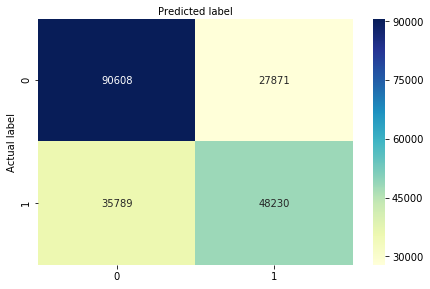

In [293]:
# show confusion matrix to understand the share of correct/incorrect predictions

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0,1])
plt.yticks(tick_marks, [0,1])

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This plot shows that of all predictions, the model predicted:
 - 90,608 true positives
 - 48,230 true negatives
 - 27,871 false positives
 - 35,789 false negatives

In [294]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6856265247064168
Precision: 0.6337630254530164
Recall: 0.5740368250038682


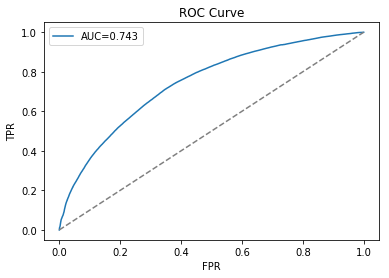

In [295]:
# create ROC plot

y_pred_proba = logistic_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

def roc_plot(fpr, tpr):

    plt.plot(fpr,tpr,label="AUC="+str(auc.round(3)))
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()
    
roc_plot(fpr, tpr)

From a fist look at the logistic classifier, we can predict the binary outcome of a track being skipped or not with 68% accuracy. From looking at the ROC curve with an AUC of .743, we can say that the model will rank a randomly chosen skipped track higher than a randomly chosen non-skipped track. Furthermore, as this curve is greater than the grey line (which represents the ROC curve of a completely random predictor), this supports that this model has power to predict the probability of a user skipping a track.

This model is highly-dimensional with over 280 features. Below, I'll take a look at the PCA for this data to understand the cumulative explanatory power of these features.

Text(0, 0.5, 'explained variance')

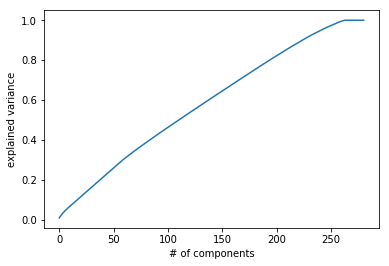

In [296]:
# PCA plot

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('explained variance')

As we can see with the PCA plot above, this model is heavily reliant on the high number of features to explain a high amount of variance.

Below, I'll test the XGBoost algorithm to see how well it performs on this data.

In [297]:
# will not use feature scaling for XGBoost, so recreate X and y data sets

X = model_data_encoded.copy().drop(columns='skipped')
y = model_data_encoded['skipped'].copy()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [298]:
# instantiate and fit XGBoost classifier

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgb_classifier.fit(X_train,y_train)

# make predictions with test data set

preds = xgb_classifier.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

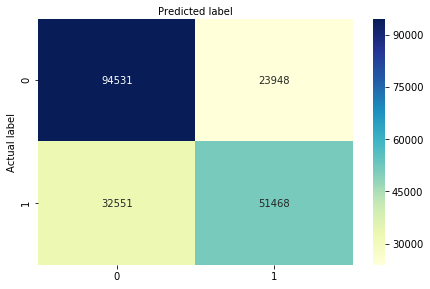

In [299]:
# show confusion matrix to understand the share of correct/incorrect predictions

confusion_matrix = metrics.confusion_matrix(y_test, preds)

fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0,1])
plt.yticks(tick_marks, [0,1])

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This plot shows that of all predictions, the model predicted:
 - 94,531 true positives
 - 51,68 true negatives
 - 23,948 false positives
 - 32,551 false negatives

In [300]:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, preds))
print("AUC: %f" % metrics.roc_auc_score(y_test, preds))
print("F1 Score: %f" % metrics.f1_score(y_test, preds))

Accuracy : 0.721
AUC: 0.705224
F1 Score: 0.645630


Great! Before even beginning hyperparameter tuning, the XGBoost classifier outperformed the logistic regression classifier, with an accuracy of 72%. I'll look at the feature importance in the XGBoost model below.

In [301]:
# show feature importance for the XGBoost classifer

feature_importance = xgb_classifier.feature_importances_
features = X_train.columns.tolist()

results = pd.DataFrame({'Features': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
#results.plot('Features', 'Importance', kind='barh', title='Feature Importances')
#plt.ylabel('Feature Importance Score')
#plt.show()
print(results)

                                              Features  Importance
248                           listening_context_tracks        0.31
243                       listening_context_collection        0.07
249                            listening_context_users        0.06
245                        listening_context_playlists        0.03
226                             client_version_36.4.20        0.02
0                   listener_prev_month_listening_time        0.02
242                           listening_context_charts        0.02
1        listener_prev_month_avg_daily_tracks_listened        0.02
74                              client_version_168.0.0        0.02
244             listening_context_personal-recommended        0.01
2                                  track_duration_mins        0.01
280         listener_top_genre_category_listened_World        0.01
247                           listening_context_stream        0.01
209                              client_version_32.0.8        

### Next Steps/Recommendations

 - As discovered previously, the 'tracks' listening context seems to have a much higher skip rate than the rest. This is supported by the model output, which shows this feature as the most important one. Given more time, I'd like to explore this listening context more to truly understand why it could lead to a significantly higher skip rate. This could lead to deeper quantative analysis as well as questions for Product.
 - It appears that the listening context, client version, and recommendation algorithm are the most important features in understanding the likelihood of a user skipping a track. 
 - The accuracy of the classifiers above was decent, but I recommend spending time on hyperparameter tuning, which can be done by means of grid search. 
 - This dataset is highly-dimensional. I recommend doing another round of feature engineering to find features that may have higher predictive power. If that is possible, then dimensionality reduction would be a great idea to simplify the model.

### Appendix

In [33]:
# use this to create confidence intervals around proportions
from math import sqrt
n1 = 31251
n2 = 469145
n1skip = 9465
n2skip = 255669
z = 1.96

p1 = n1skip/n1
p2 = n2skip/n2

test_stat = z * sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2))
lower_bound = (p2-p1) - test_stat
upper_bound = (p2-p1) + test_stat

print(f'the range is between {lower_bound} and {upper_bound}')

the range is between 0.2368075408394746 and 0.24738779016864834


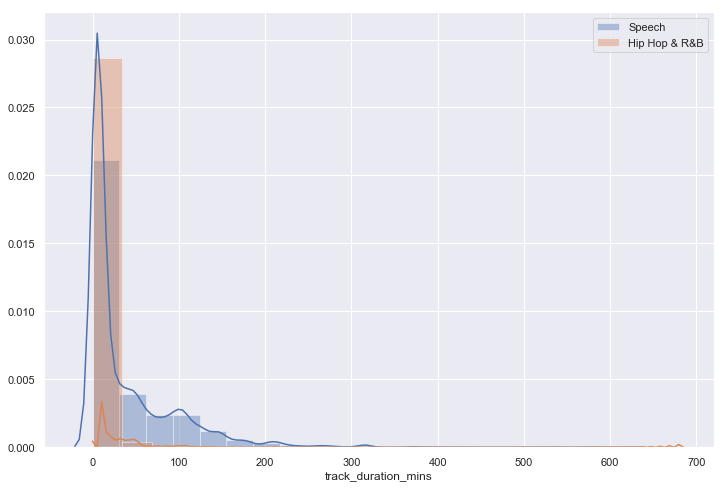

In [126]:
# compare track durations between hiphop and speech

plt.figure(figsize = (12,8))

sns.distplot(df['track_duration_mins'][df['track_genre_category'] == 'Speech'], label='Speech', bins=20)
sns.distplot(df['track_duration_mins'][df['track_genre_category'] == 'HipHop & R&B'], label='Hip Hop & R&B', bins=20)

plt.legend(loc='best')

In [320]:
speech_len = df[df['track_genre_category'] == 'Speech'].groupby(['track_duration_mins'])['track_id'].count().to_frame()
speech_len['skips'] = df[df['track_genre_category'] == 'Speech'].groupby(['track_duration_mins'])['skipped'].sum()

speech_len.reset_index(inplace=True)

In [321]:
speech_len['duration'] = pd.cut(speech_len['track_duration_mins'].round(), [i for i in range(0,205,5)])

In [322]:
speech_len_skip_perc = speech_len.groupby(['duration'])['track_id'].sum().to_frame()


In [323]:
speech_len_skip_perc['skips'] = speech_len.groupby(['duration'])['skips'].sum()

In [324]:
speech_len_skip_perc['skip_perc'] = speech_len_skip_perc['skips']/speech_len_skip_perc['track_id']
#speech_len_skip_perc.drop(columns=['skips', 'track_id'], inplace=True)
cumsum = (speech_len_skip_perc['track_id'].cumsum()/speech_len_skip_perc['track_id'].sum()).to_frame().reset_index()


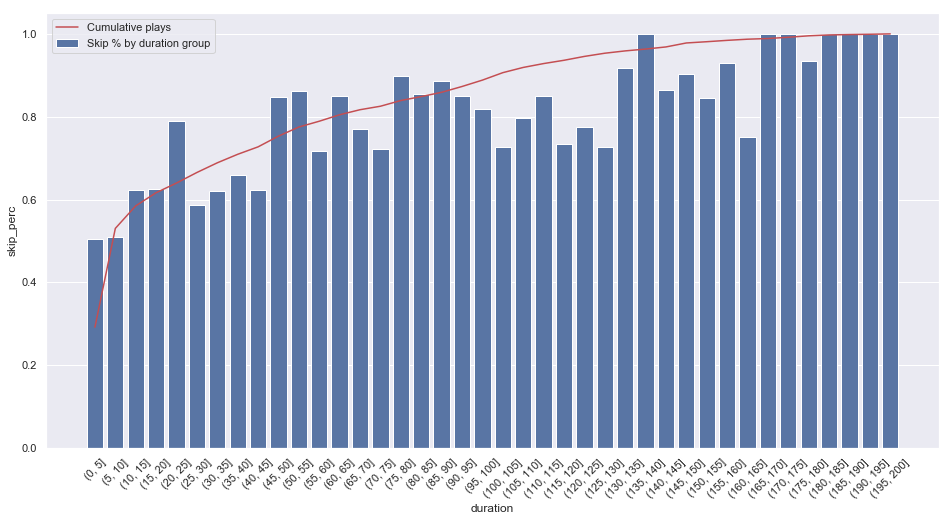

In [325]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x="duration", y="skip_perc", data=speech_len_skip_perc.reset_index(), color='b', label='Skip % by duration group')
sns.lineplot(data=cumsum['track_id'], color='r', label='Cumulative plays')
plt.xticks(rotation=45)
plt.legend(loc='best')

In [337]:
days_online = df.groupby(['days_track_online'])['track_id'].count().to_frame()
days_online['skips'] = df.groupby(['days_track_online'])['skipped'].sum()

days_online.reset_index(inplace=True)

In [338]:
days_online['skip_perc'] = days_online['skips']/days_online['track_id']

In [345]:
df[df['track_genre_category'] =='Latin'].count()

ts                                               2896
country_code                                     2896
client_version                                   2896
listening_context                                2896
recommender_algorithm_name                       2896
track_id                                         2896
track_genre_category                             2896
track_upload_date                                2896
listener_id                                      2896
listener_signup_date                             2896
listener_top_genre_category_listened             2896
listener_prev_month_listening_time               2896
listener_prev_month_avg_daily_tracks_listened    2896
track_duration_mins                              2896
listen_duration_mins                             2896
days_track_online                                2896
days_user_account_online                         2896
percent_played                                   2896
skipped                     